In [37]:
import pandas as pd

In [38]:
df2 = pd.read_csv("../data/stud.csv")


In [39]:
df2=df2.assign(total_marks=df2['maths']+df2['physics']+df2['chemistry'])
df2=df2.assign(avg_marks=df2['total_marks']/3)



In [40]:
df2

,roll_no,name,maths,physics,chemistry,total_marks,avg_marks,status
0,1,Aman,78,65,70,213,71.000000,Pass
1,2,Riya,88,92,85,265,88.333333,Pass
2,3,Neha,45,55,50,150,50.000000,Pass
3,4,Arjun,90,85,58,233,77.666667,Pass
4,5,Priya,62,58,60,180,60.000000,Pass
5,6,Rohan,35,40,38,113,37.666667,Fail
6,7,Kavya,72,35,40,147,49.000000,Pass
7,8,Sahil,55,60,58,173,57.666667,Pass
8,9,Meena,80,78,62,220,73.333333,Pass
9,10,Aditya,92,95,70,257,85.666667,Pass


In [41]:
df2.head()

,roll_no,name,maths,physics,chemistry,total_marks,avg_marks,status
0,1,Aman,78,65,70,213,71.000000,Pass
1,2,Riya,88,92,85,265,88.333333,Pass
2,3,Neha,45,55,50,150,50.000000,Pass
3,4,Arjun,90,85,58,233,77.666667,Pass
4,5,Priya,62,58,60,180,60.000000,Pass


In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   roll_no      10 non-null     int64  
 1   name         10 non-null     object 
 2   maths        10 non-null     int64  
 3   physics      10 non-null     int64  
 4   chemistry    10 non-null     int64  
 5   total_marks  10 non-null     int64  
 6   avg_marks    10 non-null     float64
 7   status       10 non-null     object 
dtypes: float64(1), int64(5), object(2)
memory usage: 772.0+ bytes


In [43]:
df2.isnull().sum()

roll_no        0
name           0
maths          0
physics        0
chemistry      0
total_marks    0
avg_marks      0
status         0
dtype: int64

In [44]:
df2.describe()

,roll_no,maths,physics,chemistry,total_marks,avg_marks
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,69.700000,66.300000,59.100000,195.100000,65.033333
std,3.02765,19.759948,20.763483,14.192721,50.441275,16.813758
min,1.00000,35.000000,35.000000,38.000000,113.000000,37.666667
25%,3.25000,56.750000,55.750000,52.000000,155.750000,51.916667
50%,5.50000,75.000000,62.500000,59.000000,196.500000,65.500000
75%,7.75000,86.000000,83.250000,68.000000,229.750000,76.583333
max,10.00000,92.000000,95.000000,85.000000,265.000000,88.333333


In [45]:
df2=df2.assign(status=df2['avg_marks'].apply(lambda x:"Pass" if x>=40 else "Fail"))

In [46]:
df2.head()

,roll_no,name,maths,physics,chemistry,total_marks,avg_marks,status
0,1,Aman,78,65,70,213,71.000000,Pass
1,2,Riya,88,92,85,265,88.333333,Pass
2,3,Neha,45,55,50,150,50.000000,Pass
3,4,Arjun,90,85,58,233,77.666667,Pass
4,5,Priya,62,58,60,180,60.000000,Pass


In [47]:
topper=df2.loc[df2['avg_marks'].idxmax()]
topper

roll_no                2
name                Riya
maths                 88
physics               92
chemistry             85
total_marks          265
avg_marks      88.333333
status              Pass
Name: 1, dtype: object

In [48]:
lowest=df2.loc[df2['avg_marks'].idxmin()]
lowest

roll_no                6
name               Rohan
maths                 35
physics               40
chemistry             38
total_marks          113
avg_marks      37.666667
status              Fail
Name: 5, dtype: object

In [49]:
result_count=df2["status"].value_counts()
result_count

status
Pass    9
Fail    1
Name: count, dtype: int64

In [50]:
sub_avg=df2[["maths","physics","chemistry"]].mean()
sub_avg

maths        69.7
physics      66.3
chemistry    59.1
dtype: float64

### Key Insights
- Majority of students passed the exam.
- The topper scored highest average marks across subjects.
- Chemistry has the lowest average score, indicating it may be the toughest subject.


In [51]:
pass_per=(result_count['Pass']/len(df2))*100
pass_per


90.0

90% Students are Passed the Examination

In [52]:
df2['avg_marks']=df2['avg_marks'].round(2)

In [53]:
df2.to_csv("../data/stud.csv", index=False)

In [54]:
df2.head()

,roll_no,name,maths,physics,chemistry,total_marks,avg_marks,status
0,1,Aman,78,65,70,213,71.00,Pass
1,2,Riya,88,92,85,265,88.33,Pass
2,3,Neha,45,55,50,150,50.00,Pass
3,4,Arjun,90,85,58,233,77.67,Pass
4,5,Priya,62,58,60,180,60.00,Pass


In [55]:
import matplotlib.pyplot as plt

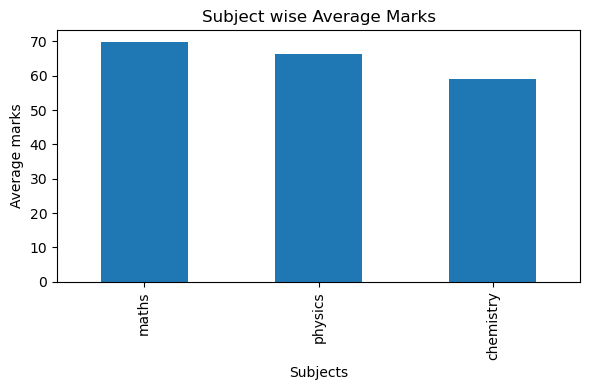

In [65]:
plt.figure(figsize=(6,4))
sub_avg.plot(kind='bar')
plt.title('Subject wise Average Marks')
plt.xlabel('Subjects')
plt.ylabel('Average marks')
plt.tight_layout()
plt.savefig("../output/sub_avg.png")

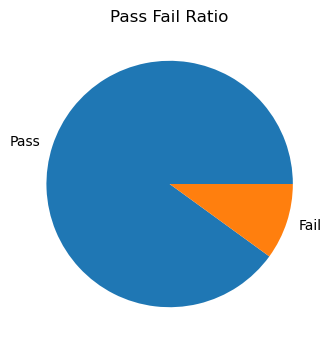

In [66]:
plt.figure(figsize=(4,4))
result_count.plot(kind='pie')
plt.title('Pass Fail Ratio')
plt.ylabel('')
plt.savefig("../output/pass_fail.png")